# Imports

In [60]:
import numpy as np
import pandas as pd
import glob
import base64
import json
import os
import ssl
from PIL import Image 
import http.client as httplib  # Python 3
import threading
import time
import pickle
import pathlib
import cv2
import numpy as np
from os import path

# Image bbox coordinates

In [61]:
# This method takes image path as argument and using sighthoundapi
# takes coordinates of licenseplate and returns it
def bbox_image_plate(new_path):
    headers = {"Content-type": "application/json",
               "X-Access-Token": "K4MCUFgx4SogxuEjrt2P5ZVaLNxBR3Tev4F5"}
    conn = httplib.HTTPSConnection("dev.sighthoundapi.com", 
           context=ssl.SSLContext(ssl.PROTOCOL_TLSv1_2))
    
    image_data = base64.b64encode(open(new_path, "rb").read()).decode()

    params = json.dumps({"image": image_data})
    conn.request("POST", "/v1/recognition?objectType=vehicle,licenseplate", params, headers)
    response = conn.getresponse()
    result = response.read()
    
    variables2=json.loads(result)
    try:
        points = variables2['objects'][0]['vehicleAnnotation']['licenseplate']['bounding']['vertices']
    except:
        return False, None, None, None, None
    
    return True, points[0]['x'], points[0]['y'], points[1]['x'], points[2]['y']

# Detect plate color

In [62]:
# This method takes image path as argument and also 4 coordinates of license plate
# it crop license plate and decided plate is red or nor
def detect_color_flag(filename, a, b, c, d):
    img = Image.open(filename).crop((a, b, c, d))
    img.save('test.jpg')
    
    img =cv2.imread("test.jpg")
    img_hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # lower mask (0-10)
    lower_red = np.array([0,50,50])
    upper_red = np.array([10,255,255])
    mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

    # upper mask (170-180)
    lower_red = np.array([170,50,50])
    upper_red = np.array([180,255,255])
    mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

    # join my masks
    mask = mask0+mask1
    if cv2.countNonZero(mask) > 100:
        return True
    return False

# Make recognition

In [63]:
# This method takes image path as argument and returns answer
def plate_recognition(image_path):
    flag, a, b, c, d = bbox_image_plate(image_path)
    if not flag:
        return -1
    if flag:
        correct_flag = detect_color_flag(image_path, a, b, c, d)
        if correct_flag:
            return 1
        else:
            return 0
def plate(data_path):
    result = plate_recognition(data_path)
    if result == -1:
        return 'სურათით ვერ დადგინა პასუხი'
    elif result == 0:
        return 'სურათზე მოცემული მანქანა განბაჟებულია'
    else:
        return 'სურათზე მოცემული მანქანა გაუნბაჟებელია'

# Testing
We need image path and we are ready to go
All kinds of examples down below

## 1) Test black plate

სურათზე მოცემული მანქანა განბაჟებულია


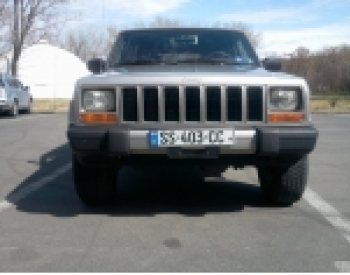

In [64]:
# image path
data_path = './data/black plate/0.jpg'
print(plate(data_path))
Image.open(data_path)

## 2) Test Red plate

სურათზე მოცემული მანქანა გაუნბაჟებელია


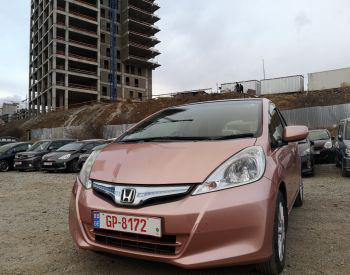

In [65]:
# image path
data_path = './data/red plate/1.jpg'
print(plate(data_path))
Image.open(data_path)

## 3) Test wrong plate

სურათით ვერ დადგინა პასუხი


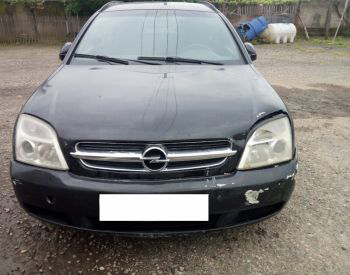

In [66]:
# image path
data_path = './data/wrong plate/3.jpg'
print(plate(data_path))
Image.open(data_path)

# For easy testing
If you want to test all pictures in the folder just write folder path and it will take care of rest job

In [67]:
folder_path = './data/black plate/'
for filename in glob.glob(folder_path + '/*.jpg'):
    result = plate_recognition(filename)
    if result == -1:
        print('სურათით ვერ დადგინა პასუხი')
    elif result == 0:
        print('სურათზე მოცემული მანქანა განბაჟებულია')
    else:
        print('სურათზე მოცემული მანქანა გაუნბაჟებელია')

სურათზე მოცემული მანქანა განბაჟებულია
სურათზე მოცემული მანქანა განბაჟებულია
სურათზე მოცემული მანქანა განბაჟებულია
სურათზე მოცემული მანქანა განბაჟებულია
სურათზე მოცემული მანქანა განბაჟებულია
სურათზე მოცემული მანქანა განბაჟებულია
სურათზე მოცემული მანქანა განბაჟებულია
სურათზე მოცემული მანქანა განბაჟებულია
სურათზე მოცემული მანქანა განბაჟებულია
სურათზე მოცემული მანქანა განბაჟებულია
სურათზე მოცემული მანქანა განბაჟებულია
სურათზე მოცემული მანქანა განბაჟებულია
სურათზე მოცემული მანქანა განბაჟებულია
სურათზე მოცემული მანქანა განბაჟებულია
სურათზე მოცემული მანქანა განბაჟებულია
სურათზე მოცემული მანქანა განბაჟებულია
სურათზე მოცემული მანქანა განბაჟებულია
სურათზე მოცემული მანქანა განბაჟებულია
სურათზე მოცემული მანქანა განბაჟებულია
